In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
cd=pd.read_csv('Concrete_Data.csv')

In [2]:
cd

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


Observation

This is Continuous data so will use regression model. 

In [3]:
# Checking for null vales
cd.isnull().sum()

Cement              0
Blast               0
Fly Ash             0
Water               0
Superplasticizer    0
CA                  0
FA                  0
Age                 0
CMS                 0
dtype: int64

Observation

there is no null values

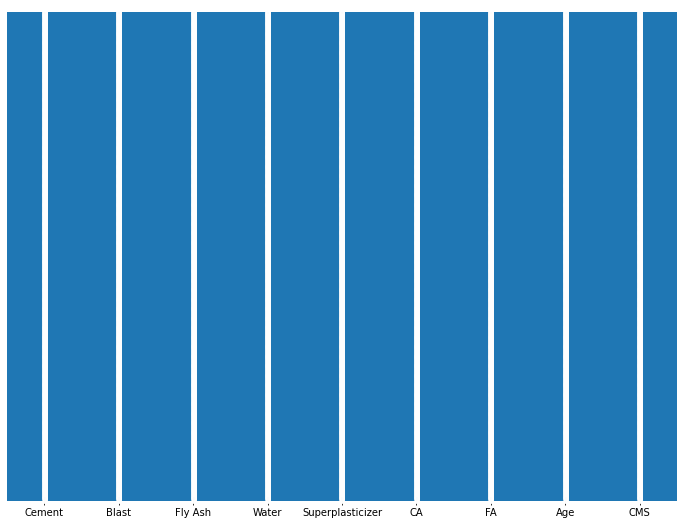

In [4]:
# Checking the null values with help of heatmap
plt.figure(figsize=(12,9))
sns.heatmap(cd.isnull(),yticklabels=False,cmap='tab10',cbar=False,annot=True)

In [5]:
#Checking the columns
cd.shape

(1030, 9)

In [6]:
# Checking the columns name
cd.columns

Index(['Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer', 'CA', 'FA',
       'Age', 'CMS'],
      dtype='object')

In [7]:
#Checking the data type of columns
cd.dtypes

Cement              float64
Blast               float64
Fly Ash             float64
Water               float64
Superplasticizer    float64
CA                  float64
FA                  float64
Age                   int64
CMS                 float64
dtype: object

In [8]:
# Checking the information of the dataset
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   Blast             1030 non-null   float64
 2   Fly Ash           1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   CA                1030 non-null   float64
 6   FA                1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   CMS               1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


Observation:

1- there are 1030 raws and 9 columns.

2- there are no missing values present in the dateset.

3- all the columns has float data type except Age. Age has int64 data type.

# Summary Statistics

In [9]:
cd.describe()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Observation:

There are huge difference between 75% and max in columns Cement,Blast,Fly Ash, Superplasticizer, Age so in these columns outliers may be present. 

The minimum CMS is 2.33 and maximun is 82.60

Std is maximum in Cement.

# Check the correlation

In [10]:
cd_cor=cd.corr()
cd_cor

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
CA,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
FA,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
CMS,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


We can see correlation between the columns using above data.

Will use heatmap for better understanding. 

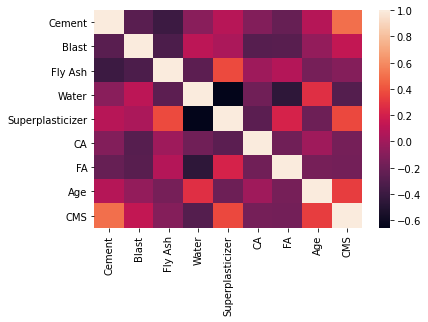

In [11]:
sns.heatmap(data=cd_cor)

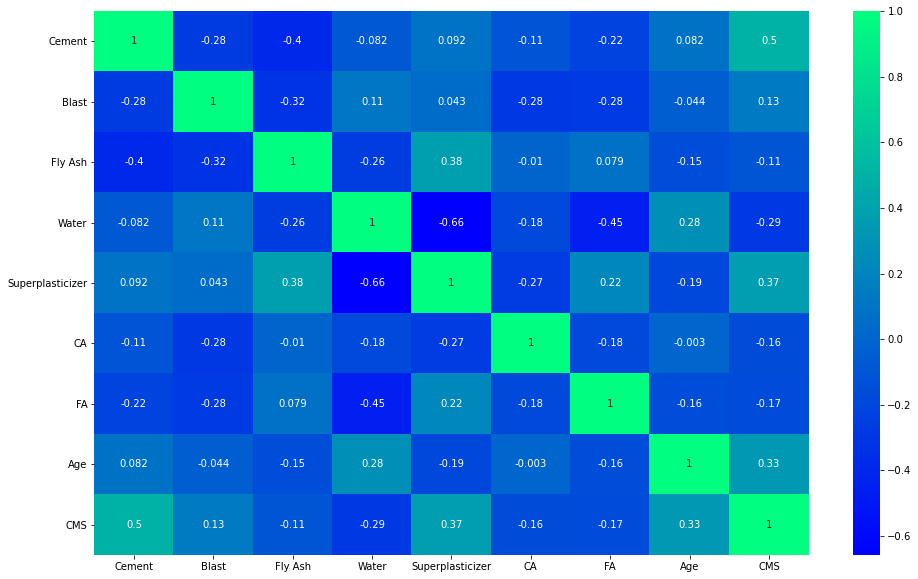

In [12]:
plt.figure(figsize=(16,10))
sns.heatmap(cd_cor,annot=True,cmap='winter')

Observation:
    
There is nominal correlation between Cement->CMS, Fly Ash->Superplasticizer and Superplasticizer->CMS.

Fly Ash, Water, CA, FA is highly negatively correcated with CMS 

# Data Visualization 

Univariate Analysis

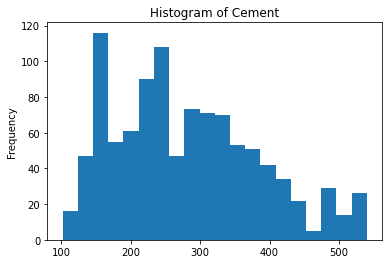

In [13]:
cd['Cement'].plot.hist(bins=20)
plt.title('Histogram of Cement')
plt.show()

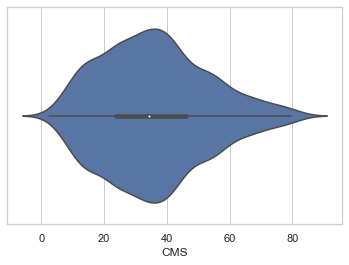

In [14]:
sns.set (style='whitegrid')
sns.violinplot(cd['CMS'])
plt.show()

Observation - Maximum CMS is between 30 to 42.

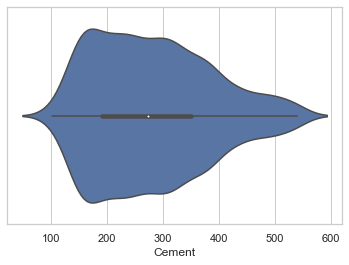

In [15]:
sns.violinplot(cd['Cement'])
plt.show()

Observation - Maximum cement is between 150 to 340.

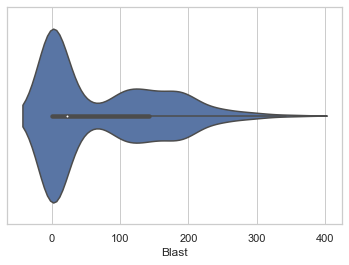

In [16]:
sns.violinplot(cd['Blast'])
plt.show()

Obeservation - Maximum Blast is between 0 to 50.

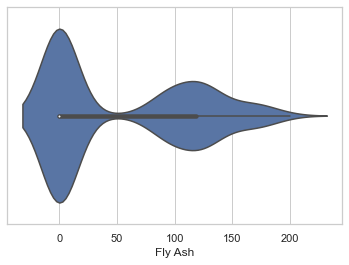

In [17]:
sns.violinplot(cd['Fly Ash'])
plt.show()

Observation - maximum Fly Ash is between 0 to 25 and 100 to 150

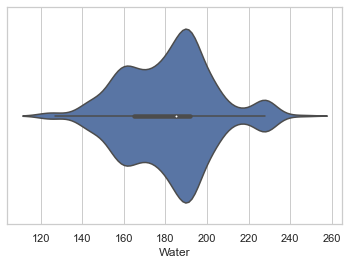

In [18]:
sns.violinplot(cd['Water'])
plt.show()

Observation - Maximum water is between 180 to 200.

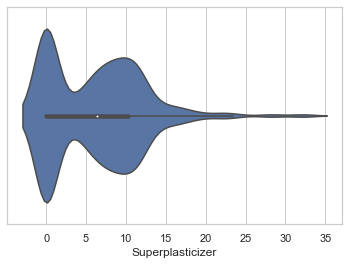

In [19]:
sns.violinplot(cd['Superplasticizer'])
plt.show()

Observation - Maximum superplasticizer is between 0 to 13.

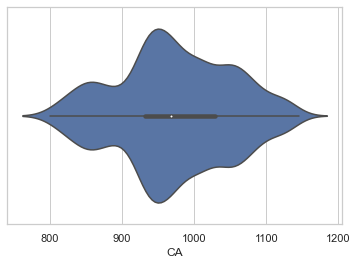

In [20]:
sns.violinplot(cd['CA'])
plt.show()

Observation - Maximum CA is between 935 to 1000.

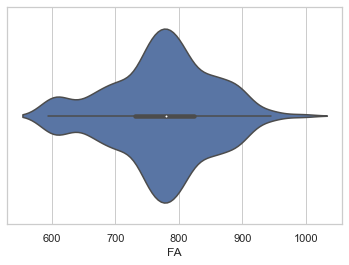

In [21]:
sns.violinplot(cd['FA'])
plt.show()

Observation - Maximum FA is between 750 to 830.

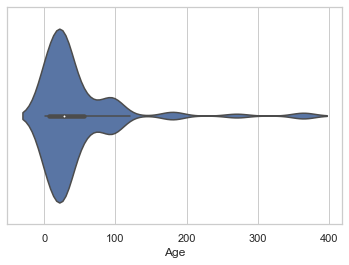

In [22]:
sns.violinplot(cd['Age'])
plt.show()

Observation - Maximum Age is between 0 to 70.

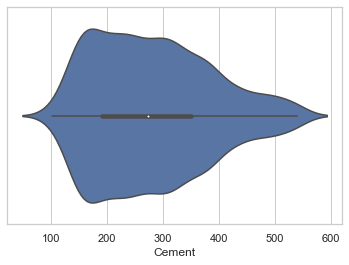

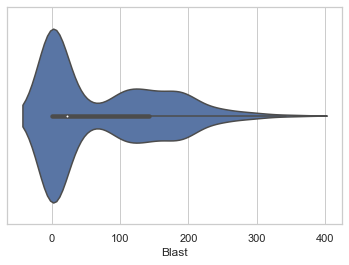

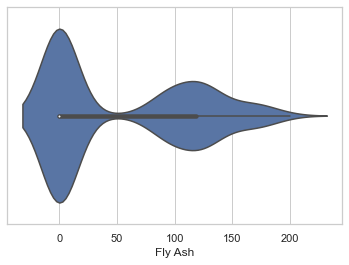

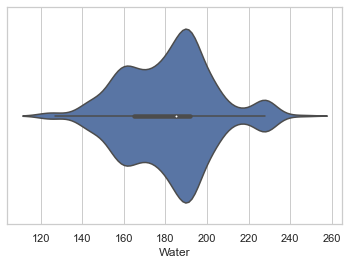

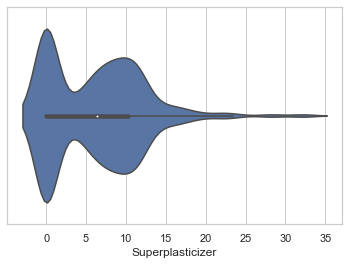

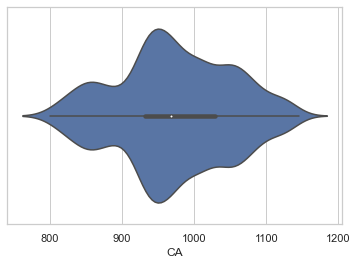

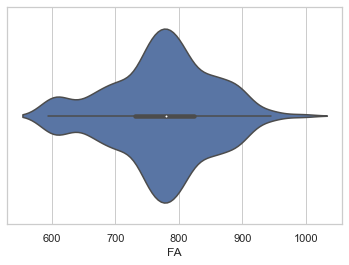

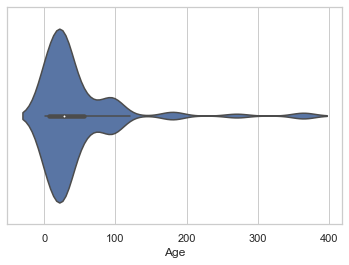

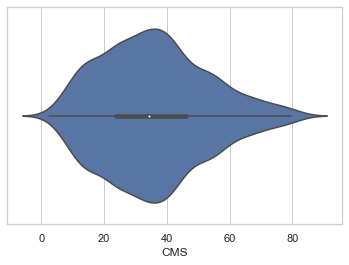

In [23]:
for i in cd.columns:
    sns.violinplot(cd[i])
    plt.show()

# Bivariate Analysis

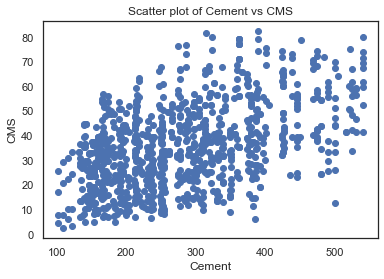

In [24]:
sns.set(style='white')
plt.scatter(cd['Cement'],cd['CMS'])
plt.xlabel('Cement')
plt.ylabel('CMS')
plt.title('Scatter plot of Cement vs CMS')
plt.show()

Observation - When Cement is between 400 to 550 CMS is more than 40.

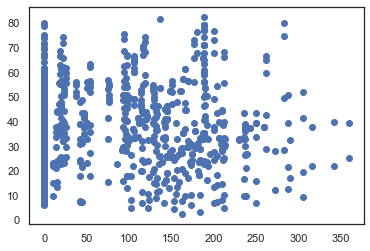

In [25]:
plt.scatter(cd['Blast'],cd['CMS'])
plt.show()

Observation - there is no much relation between Blast and CMS

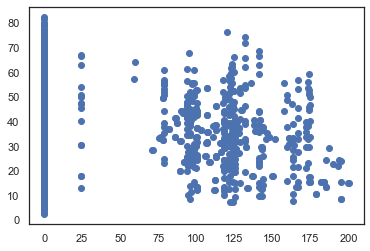

In [26]:
plt.scatter(cd['Fly Ash'],cd['CMS'])
plt.show()

Observation - there is no much relation between Blast and CMS

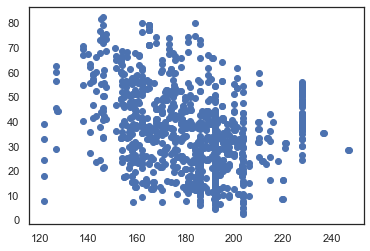

In [27]:
plt.scatter(cd['Water'],cd['CMS'])
plt.show()

 When Water is between 140 to 160 CMS is more than 40.

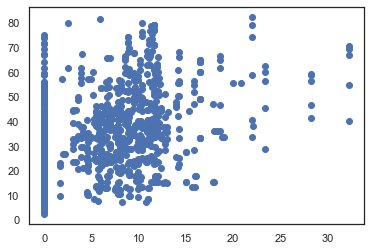

In [28]:
plt.scatter(cd['Superplasticizer'],cd['CMS'])
plt.show()

When Superplasticizer is between 15 to 35 CMS is more than 40.

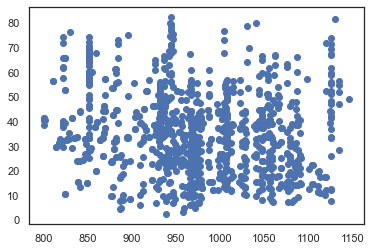

In [29]:
plt.scatter(cd['CA'],cd['CMS'])
plt.show()

 Observation - there is no much relation between Blast and CMS

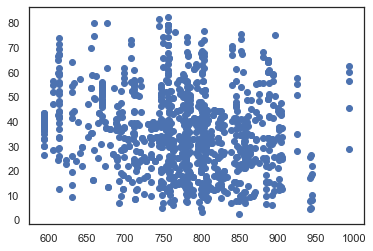

In [30]:
plt.scatter(cd['FA'],cd['CMS'])
plt.show()

Observation - there is no much relation between Blast and CMS

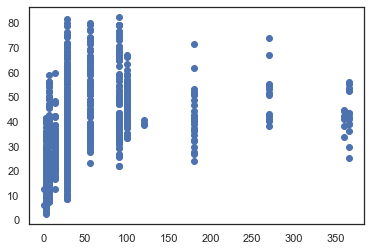

In [31]:
plt.scatter(cd['Age'],cd['CMS'])
plt.show()

When Age is between 50 to 365 CMS is more than 30.

# Plotting Outliers

In [32]:
cd.columns

Index(['Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer', 'CA', 'FA',
       'Age', 'CMS'],
      dtype='object')

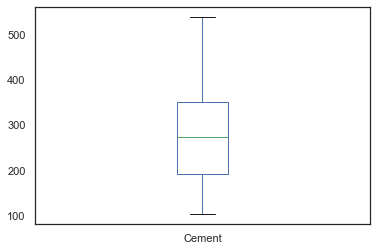

In [33]:
cd['Cement'].plot.box()

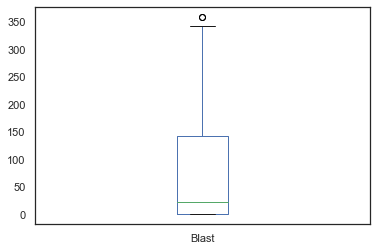

In [34]:
cd['Blast'].plot.box()

Observation - There are may be outliers in Blast.

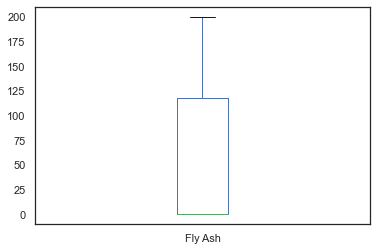

In [35]:
cd['Fly Ash'].plot.box()

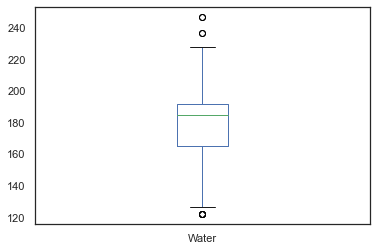

In [36]:
cd['Water'].plot.box()

Observation - There are may be outliers in Water.

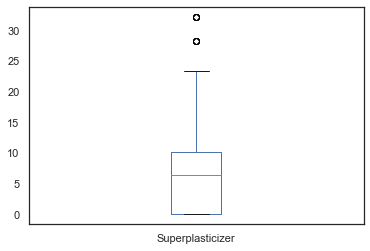

In [37]:
cd['Superplasticizer'].plot.box()

Observation - There are may be outliers in Superplasticizer.

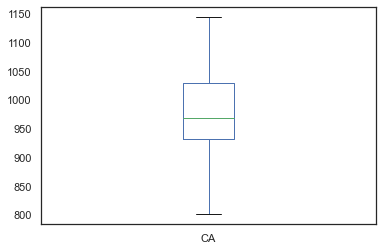

In [38]:
cd['CA'].plot.box()

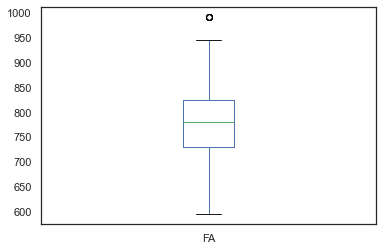

In [39]:
cd['FA'].plot.box()

Observation - There are may be outliers in FA.

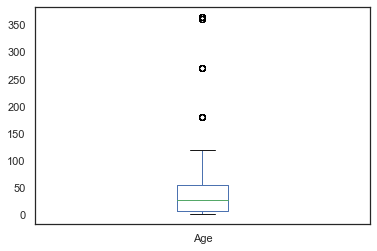

In [40]:
cd['Age'].plot.box()

Observation - There are may be outliers in Age.

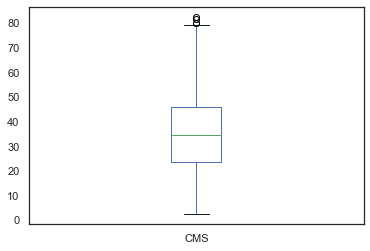

In [41]:
cd['CMS'].plot.box()

In [42]:
collist=cd.columns.values
ncol=17
nrow=10

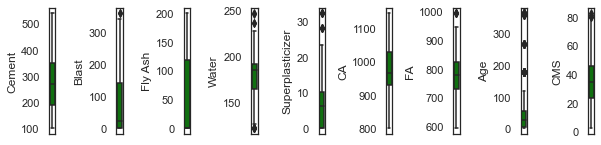

In [43]:
plt.figure(figsize=(16,20))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(cd[collist[i]],color='green',orient='v')
    plt.tight_layout()

# To check the distribution of Skewness

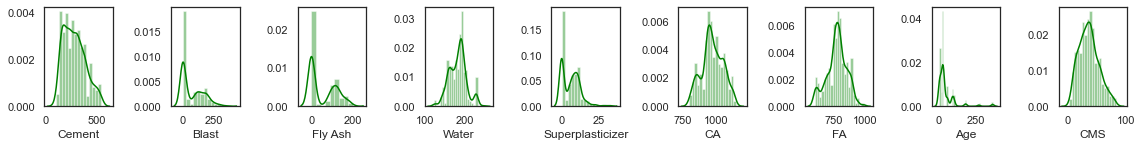

In [44]:
plt.figure(figsize=(30,20))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.distplot(cd[collist[i]],color='green')
    plt.tight_layout()

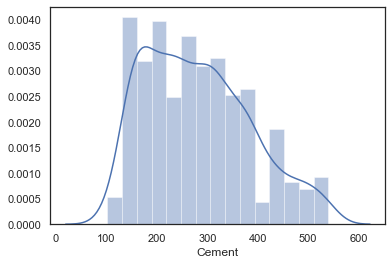

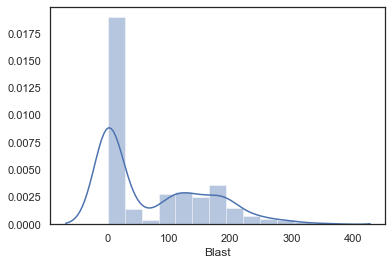

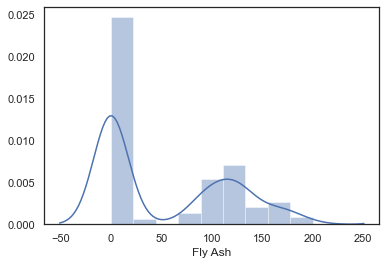

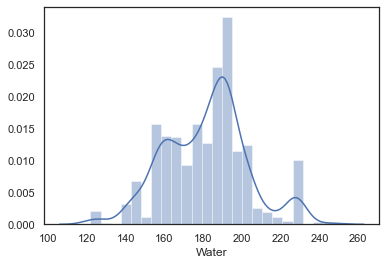

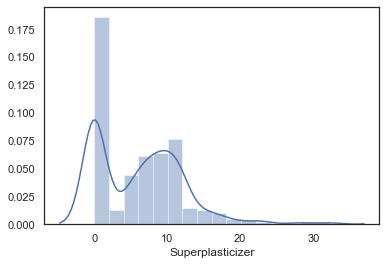

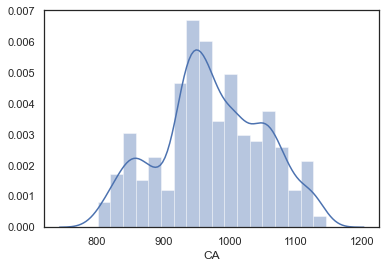

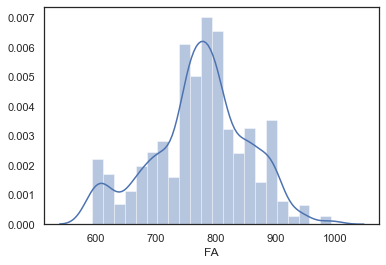

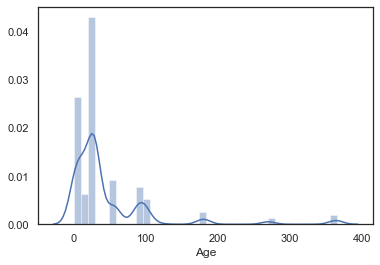

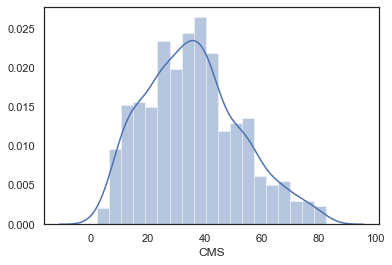

In [45]:
for i in cd.columns:
    sns.distplot(cd[i])
    plt.show()

In [46]:
#Checking skewness of the data
cd.skew()

Cement              0.509481
Blast               0.800717
Fly Ash             0.537354
Water               0.074628
Superplasticizer    0.907203
CA                 -0.040220
FA                 -0.253010
Age                 3.269177
CMS                 0.416977
dtype: float64

In [47]:
# Treating skewness via log method

for col in cd.columns:
    if cd[col].skew()>0.55:
        cd[col]=np.log1p(cd[col])

In [48]:
#Checking skewness again
cd.skew()

Cement              0.509481
Blast              -0.032700
Fly Ash             0.537354
Water               0.074628
Superplasticizer   -0.324821
CA                 -0.040220
FA                 -0.253010
Age                -0.005085
CMS                 0.416977
dtype: float64

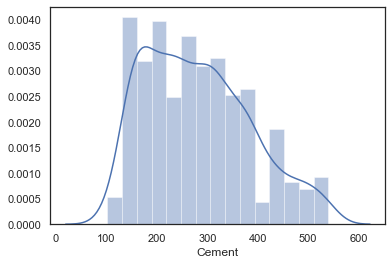

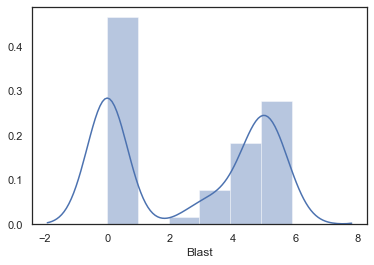

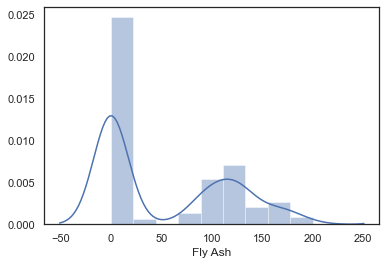

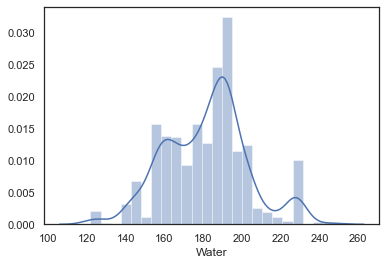

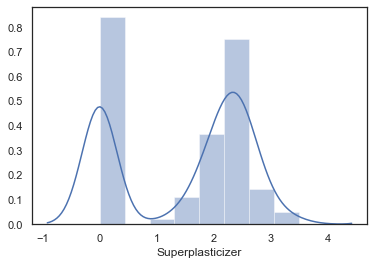

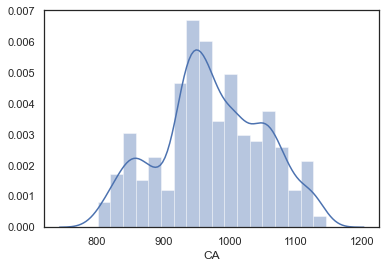

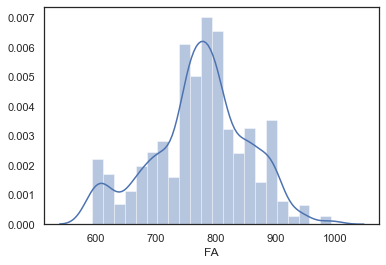

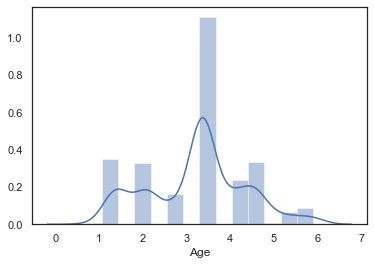

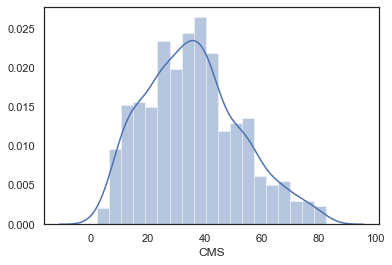

In [49]:
for i in cd.columns:
    sns.distplot(cd[i])
    plt.show()

# Removing Outliers

In [50]:
from scipy.stats import zscore
z=np.abs(zscore(cd))
z

array([[2.47791487, 1.05932371, 0.84714393, ..., 1.21767004, 0.11270216,
        2.64540763],
       [2.47791487, 1.05932371, 0.84714393, ..., 1.21767004, 0.11270216,
        1.56142148],
       [0.49142531, 1.00083701, 0.84714393, ..., 2.24091709, 2.1262525 ,
        0.26662698],
       ...,
       [1.27008832, 0.99177742, 0.85063487, ..., 0.0801067 , 0.11270216,
        0.72572939],
       [1.16860982, 1.11222168, 0.84714393, ..., 0.19116644, 0.11270216,
        0.18253855],
       [0.19403325, 0.85719292, 0.3769452 , ..., 0.15074782, 0.11270216,
        0.20469738]])

In [51]:
threshold=3
print(np.where(z>3))

(array([873, 936], dtype=int64), array([3, 3], dtype=int64))


In [52]:
cd_new=cd[(z<3).all(axis=1)]

In [53]:
print(cd.shape)

(1030, 9)


In [54]:
print(cd_new.shape)

(1028, 9)


Observation - Now we can see two row removed from dataset due to outliers.

# Model Training

In [55]:
# Separating data into input and output variables.

cd_x=cd_new.drop(columns=['CMS'])

In [56]:
y=pd.DataFrame(cd_new['CMS'])

In [57]:
y

,CMS
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30
...,...
1025,44.28
1026,31.18
1027,23.70
1028,32.77


In [58]:
# Scaling the input Variable

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(cd_x)
x=pd.DataFrame(x,columns=cd_x.columns)

In [59]:
#Checking skewness again
x.skew()

Cement              0.506929
Blast              -0.029014
Fly Ash             0.538466
Water               0.037290
Superplasticizer   -0.322343
CA                 -0.042301
FA                 -0.257366
Age                -0.004424
dtype: float64

In [60]:
# Make input and output variables into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [61]:
# Checking train and test data size
print(x_train.shape,'\t',x_test.shape)

(822, 8) 	 (206, 8)


In [62]:
print(y_train.shape,'\t',y_test.shape)

(822, 1) 	 (206, 1)


In [63]:
# Importing models library

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
# Importing error metrics

from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [64]:
# Using algorithms via for loop

model=[LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR(),KNeighborsRegressor(),DecisionTreeRegressor()]
for p in model:
    p.fit(x_train,y_train)
    print('Score of', p , 'is:' , p.score(x_train,y_train))
    predp=p.predict(x_test)
    print('Error:')
    print('Mean absolute error:', mean_absolute_error(y_test,predp))
    print('Mean squared error:', mean_squared_error(y_test,predp))
    print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,predp)))
    print('r2_score:', r2_score(y_test,predp))
    print('********************************************************************************************')
    print('\n')

Score of LinearRegression() is: 0.8018284218358926
Error:
Mean absolute error: 5.656162165881134
Mean squared error: 49.59723936123286
Root Mean squared error: 7.042530749754158
r2_score: 0.8157334390718877
********************************************************************************************


Score of Lasso() is: 0.7811572138423524
Error:
Mean absolute error: 5.9272598184185865
Mean squared error: 55.346587037620615
Root Mean squared error: 7.439528683836135
r2_score: 0.7943731267328892
********************************************************************************************


Score of Ridge() is: 0.801825127241989
Error:
Mean absolute error: 5.6539034702208335
Mean squared error: 49.55733409369135
Root Mean squared error: 7.039697017179884
r2_score: 0.8158816974529486
********************************************************************************************


Score of ElasticNet() is: 0.6837272401783432
Error:
Mean absolute error: 7.621205011940424
Mean squared error: 83.

In [65]:
# Finding out best paramter using GridsearchCV
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeRegressor()
parameters={'random_state':range(42,100)}
gc=GridSearchCV(dt,parameters)
gc.fit(x,y)
gc.best_params_


{'random_state': 70}

In [66]:
#Using DecisionTreeRegressor model with best results

dtc=DecisionTreeRegressor(criterion='friedman_mse',random_state=70)
dtc.fit(x_train,y_train)
print('Score:', dtc.score(x_train,y_train))
preddt=dtc.predict(x_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y_test,preddt))
print('Mean squared error:', mean_squared_error(y_test,preddt))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,preddt)))
print('\n')
print('r2_score:', r2_score(y_test,preddt))
    

Score: 0.9965837972885744


Mean absolute error: 3.8744417475728157
Mean squared error: 35.5676088592233
Root Mean squared error: 5.963858554595615


r2_score: 0.8678571418624533


In [67]:
# Cross validate of DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtc,x,y,cv=5,scoring='r2')
print('Score:', score)
print('Mean Score:', score.std())
print('Standard Deviation:', score.std())

Score: [ 0.42440926  0.44927195  0.38866585  0.80254262 -1.17623739]
Mean Score: 0.693209655801231
Standard Deviation: 0.693209655801231


# Using Ensemble Technique to boostup score

In [68]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,random_state=70)
rf.fit(x_train,y_train)
print('score:',rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y_test,predrf))
print('Mean squared error:', mean_squared_error(y_test,predrf))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,predrf)))
print('\n')
print('r2_score:', r2_score(y_test,predrf))

score: 0.9853406787379864


Mean absolute error: 3.2948368608414245
Mean squared error: 24.16269797371829
Root Mean squared error: 4.915556730800519


r2_score: 0.9102293330091696


In [69]:
from sklearn.ensemble import AdaBoostRegressor


ad=AdaBoostRegressor(base_estimator=dtc,n_estimators=20,learning_rate=1.0,random_state=70)
ad.fit(x_train,y_train)
print('score:',ad.score(x_train,y_train))
predad=ad.predict(x_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y_test,predad))
print('Mean squared error:', mean_squared_error(y_test,predad))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,predad)))
print('\n')
print('r2_score:', r2_score(y_test,predad))

score: 0.9919449716037232


Mean absolute error: 3.4856631584672693
Mean squared error: 27.270346142315628
Root Mean squared error: 5.22210169781436


r2_score: 0.8986836169980166


RandomForestRegressor is working well because it gives the best r2 score.
So i save RandomForestRegressor as my final Model. 

In [70]:
# Cross validate of RandomForestRegressor
from sklearn.model_selection import cross_val_score
score=cross_val_score(rf,x,y,cv=5,scoring='r2')
print('Score:', score)
print('Mean Score:', score.std())
print('Standard Deviation:', score.std())

Score: [ 0.6423759   0.68138543  0.75842704  0.83531391 -1.23888347]
Mean Score: 0.7900852908422715
Standard Deviation: 0.7900852908422715


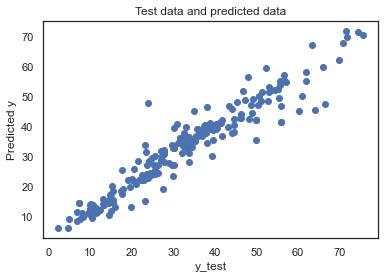

In [71]:
# Plotting scatter plot between test data and predicted data for RandomForestRegressor
plt.scatter(y_test,predrf)
plt.xlabel('y_test')
plt.ylabel('Predicted y')
plt.title('Test data and predicted data')
plt.show()

In [72]:
# Saving the RandomForestRegressor\
import joblib
joblib.dump(rf,'Concrete Data Evaluation.pkl')

['Concrete Data Evaluation.pkl']